# 二.建立模型

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
# os.chdir("/content/drive/MyDrive/大三/下學期/機器學習應用/Datasets/ Bank Marketing")
os.chdir("/content/drive/MyDrive/機器學習期末/Datasets")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering import
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder ,OrdinalEncoder ,StandardScaler
from imblearn.over_sampling import SMOTE

# Model import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier ,XGBRegressor
from sklearn.svm import SVC ,SVR
from sklearn.neighbors import KNeighborsClassifier ,KNeighborsRegressor

# Evaluate import
from sklearn import metrics
from sklearn.metrics import accuracy_score ,precision_score ,recall_score ,f1_score ,roc_auc_score ,roc_curve ,classification_report ,confusion_matrix
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error ,explained_variance_score

# PipeLine use import
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# sns.set(style="whitegrid")
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
plt.rcParams['axes.unicode_minus'] = False # 正常顯示負號

# Load Data

In [ ]:
df = pd.read_csv("./bank_handled.csv")

df # 45211 rows × 17 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,contact_cellular,contact_telephone
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,5,8.0,261,1,-1,0,0,0.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,5,8.0,151,1,-1,0,0,0.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,5,8.0,76,1,-1,0,0,0.0,0.0
3,47,1.0,1.0,1.0,0.0,1506,1.0,0.0,5,8.0,92,1,-1,0,0,0.0,0.0
4,33,1.0,2.0,1.0,0.0,1,0.0,0.0,5,8.0,198,1,-1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,17,9.0,977,3,-1,0,1,1.0,0.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,17,9.0,456,2,-1,0,1,1.0,0.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,17,9.0,1127,5,184,3,1,1.0,0.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,17,9.0,508,4,-1,0,0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   job                45211 non-null  float64
 2   marital            45211 non-null  float64
 3   education          45211 non-null  float64
 4   default            45211 non-null  float64
 5   balance            45211 non-null  int64  
 6   housing            45211 non-null  float64
 7   loan               45211 non-null  float64
 8   day                45211 non-null  int64  
 9   month              45211 non-null  float64
 10  duration           45211 non-null  int64  
 11  campaign           45211 non-null  int64  
 12  pdays              45211 non-null  int64  
 13  previous           45211 non-null  int64  
 14  y                  45211 non-null  int64  
 15  contact_cellular   45211 non-null  float64
 16  contact_telephone  452

In [ ]:
# Numerical statistics
df.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,contact_cellular,contact_telephone
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,4.28,1.17,1.14,0.02,1362.27,0.56,0.16,15.81,5.52,258.16,2.76,40.20,0.58,0.12,0.65,0.06
std,10.62,3.24,0.61,0.65,0.13,3044.77,0.50,0.37,8.32,3.01,257.53,3.10,100.13,2.30,0.32,0.48,0.25
min,18.00,0.00,0.00,0.00,0.00,-8019.00,0.00,0.00,1.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00
25%,33.00,1.00,1.00,1.00,0.00,72.00,0.00,0.00,8.00,3.00,103.00,1.00,-1.00,0.00,0.00,0.00,0.00
50%,39.00,4.00,1.00,1.00,0.00,448.00,1.00,0.00,16.00,6.00,180.00,2.00,-1.00,0.00,0.00,1.00,0.00
75%,48.00,7.00,2.00,2.00,0.00,1428.00,1.00,0.00,21.00,8.00,319.00,3.00,-1.00,0.00,0.00,1.00,0.00
max,95.00,10.00,2.00,2.00,1.00,102127.00,1.00,1.00,31.00,11.00,4918.00,63.00,871.00,275.00,1.00,1.00,1.00


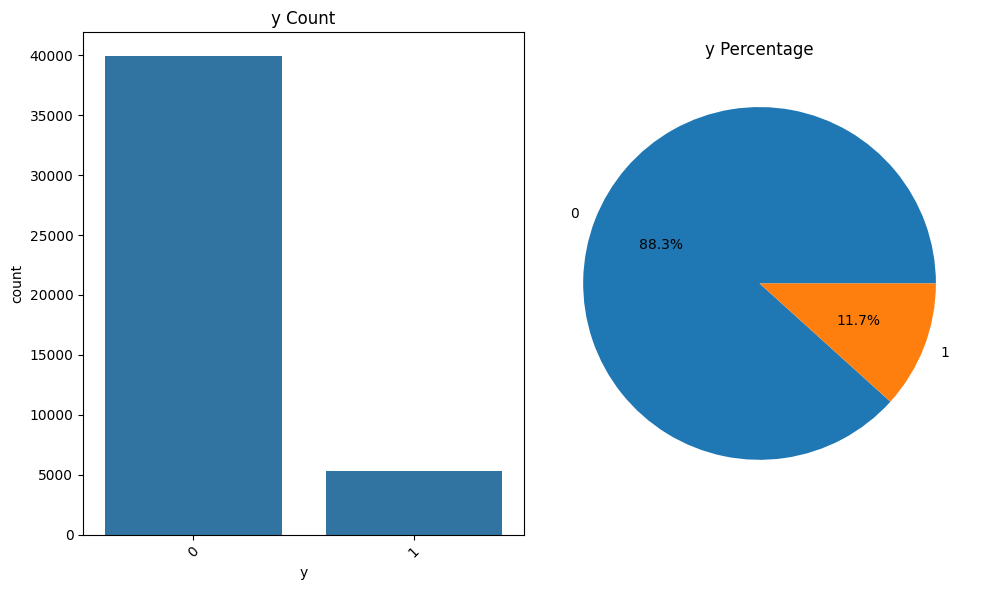

y
0    39922
1     5289
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1 ,2 ,1)
sns.countplot(data =df ,x ='y')
plt.xticks(rotation=45)
plt.title('y Count')

plt.subplot(1 ,2 ,2)
profile_counts = df['y'].value_counts()
plt.pie(profile_counts, labels = profile_counts.index, autopct='%1.1f%%')
plt.title('y Percentage')
plt.tight_layout()
plt.show()

print(df['y'].value_counts()) # No:39922(88.3%) ,Yes:5289(11.7%)

# Train Test Split
資料分割，將資料集拆分為訓練集和測試集，針對訓練集的數值特徵做標準化然後做異常值處理

In [ ]:
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('='*30)
# 查看全部資料的類別比例
print(pd.Series(y).value_counts(normalize=True))
# 查看訓練集標籤的分佈
print(pd.Series(y_train).value_counts(normalize=True))
# 查看測試集的標籤分佈
print(pd.Series(y_test).value_counts(normalize=True))

X_train: (31647, 16)
X_test: (13564, 16)
y_train: (31647,)
y_test: (13564,)
y
0    0.88
1    0.12
Name: proportion, dtype: float64
y
0    0.88
1    0.12
Name: proportion, dtype: float64
y
0    0.88
1    0.12
Name: proportion, dtype: float64


In [ ]:
from collections import Counter

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 27956, 1: 3691})
Testing target statistics: Counter({0: 11966, 1: 1598})


In [ ]:
numeric_cols = X_train.select_dtypes(include=['int','float']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) # 在測試集上做相同的轉換

如果在測試集上使用fit_transform，那測試集會使用它自己的平均值和標準差進行轉換，這會導致訓練和測試的資料分布不一致

In [ ]:
X_train # 31647 rows × 16 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
10747,-4.65e-01,1.46,1.37,1.33,-0.14,-0.46,-1.12,-0.44,0.14,0.16,-0.40,0.39,-0.41,-0.24,-1.36,-0.26
26054,1.42e+00,-0.70,-0.28,-0.21,-0.14,-0.39,-1.12,-0.44,0.38,1.16,0.21,0.07,-0.41,-0.24,0.74,-0.26
9125,4.76e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,-1.30,0.16,-0.67,-0.24,-0.41,-0.24,-1.36,-0.26
41659,5.49e-03,-0.08,-1.93,1.33,-0.14,0.69,-1.12,-0.44,-1.78,1.49,0.17,-0.56,0.78,1.81,0.74,-0.26
4443,-2.77e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,0.50,0.82,-0.65,-0.56,-0.41,-0.24,-1.36,-0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2.88e-01,-0.39,1.37,-1.75,-0.14,-0.10,-1.12,-0.44,0.26,0.16,7.09,-0.56,-0.41,-0.24,-1.36,-0.26
44732,-1.69e+00,1.15,1.37,1.33,-0.14,-0.29,-1.12,-0.44,-0.94,1.82,-0.18,-0.56,0.51,0.17,0.74,-0.26
38158,-6.53e-01,1.46,-1.93,1.33,-0.14,-0.01,0.89,-0.44,-0.10,0.82,-0.07,-0.56,-0.41,-0.24,0.74,-0.26
860,-7.47e-01,0.23,-0.28,-0.21,-0.14,-0.40,-1.12,-0.44,-1.06,0.82,-0.57,-0.56,-0.41,-0.24,-1.36,-0.26


In [ ]:
X_train[numeric_cols].describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
count,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04,3.16e+04
mean,1.69e-16,3.82e-17,-2.16e-17,1.38e-16,-1.12e-18,6.96e-18,-9.79e-17,-3.77e-17,-6.96e-17,3.19e-17,8.98e-19,8.37e-17,3.84e-17,-1.89e-17,-8.87e-17,-8.69e-17
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-2.16e+00,-1.32e+00,-1.93e+00,-1.75e+00,-1.41e-01,-2.76e+00,-1.12e+00,-4.37e-01,-1.78e+00,-1.84e+00,-9.95e-01,-5.62e-01,-4.11e-01,-2.41e-01,-1.36e+00,-2.62e-01
25%,-7.47e-01,-1.01e+00,-2.78e-01,-2.13e-01,-1.41e-01,-4.33e-01,-1.12e+00,-4.37e-01,-9.41e-01,-8.40e-01,-5.97e-01,-5.62e-01,-4.11e-01,-2.41e-01,-1.36e+00,-2.62e-01
50%,-1.83e-01,-8.09e-02,-2.78e-01,-2.13e-01,-1.41e-01,-3.06e-01,8.94e-01,-4.37e-01,2.05e-02,1.59e-01,-3.00e-01,-2.45e-01,-4.11e-01,-2.41e-01,7.35e-01,-2.62e-01
75%,6.64e-01,8.46e-01,1.37e+00,1.33e+00,-1.41e-01,2.55e-02,8.94e-01,-4.37e-01,6.21e-01,8.25e-01,2.37e-01,7.22e-02,-4.11e-01,-2.41e-01,7.35e-01,-2.62e-01
max,5.08e+00,1.77e+00,1.37e+00,1.33e+00,7.12e+00,2.68e+01,8.94e-01,2.29e+00,1.82e+00,1.82e+00,1.80e+01,1.91e+01,8.25e+00,1.13e+02,7.35e-01,3.81e+00


圖表可以看到經過標準化的處理後，訓練集的平均值趨近於0，方差為1

In [ ]:
X_test # 13564 rows × 16 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
3776,-8.86e-02,-1.01,-0.28,-0.21,-0.14,-0.26,0.89,-0.44,0.02,0.82,-0.25,-0.56,-0.41,-0.24,-1.36,-0.26
9928,5.70e-01,0.85,1.37,-0.21,-0.14,0.77,-1.12,-0.44,-0.82,0.16,-0.67,-0.24,-0.41,-0.24,-1.36,-0.26
33409,-1.50e+00,1.15,1.37,1.33,-0.14,-0.28,0.89,-0.44,0.50,-1.84,-0.12,-0.56,-0.41,-0.24,0.74,-0.26
31885,9.95e-02,-0.08,-0.28,1.33,-0.14,0.14,-1.12,-0.44,-0.82,-1.84,0.21,-0.56,2.94,0.17,0.74,-0.26
15738,1.42e+00,-0.08,-0.28,1.33,-0.14,-0.38,-1.12,2.29,0.62,-0.17,-0.53,-0.24,-0.41,-0.24,0.74,-0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,4.76e-01,1.46,1.37,1.33,-0.14,0.48,-1.12,-0.44,-1.30,0.16,-0.81,-0.56,-0.41,-0.24,-1.36,-0.26
380,-2.77e-01,-1.01,-0.28,-0.21,-0.14,-0.20,0.89,-0.44,-1.18,0.82,-0.48,-0.56,-0.41,-0.24,-1.36,-0.26
7713,5.49e-03,-1.32,-0.28,-0.21,-0.14,1.07,-1.12,-0.44,1.70,0.82,0.16,0.07,-0.41,-0.24,-1.36,-0.26
12188,5.49e-03,1.15,-0.28,-0.21,-0.14,-0.02,-1.12,-0.44,0.50,0.16,-0.89,0.39,-0.41,-0.24,-1.36,-0.26


In [ ]:
X_test[numeric_cols].describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
count,1.36e+04,13564.00,1.36e+04,13564.00,13564.00,1.36e+04,1.36e+04,1.36e+04,1.36e+04,1.36e+04,1.36e+04,1.36e+04,1.36e+04,1.36e+04,13564.00,1.36e+04
mean,-1.71e-03,0.01,-5.04e-03,0.02,-0.03,4.80e-03,-1.35e-03,-2.10e-03,-9.29e-03,6.25e-04,7.64e-03,-8.87e-03,-4.82e-03,-7.59e-03,-0.01,-1.22e-03
std,9.96e-01,1.00,1.01e+00,1.01,0.88,1.07e+00,1.00e+00,9.98e-01,1.00e+00,1.00e+00,9.83e-01,9.40e-01,9.82e-01,8.05e-01,1.00,9.98e-01
min,-2.16e+00,-1.32,-1.93e+00,-1.75,-0.14,-3.15e+00,-1.12e+00,-4.37e-01,-1.78e+00,-1.84e+00,-9.95e-01,-5.62e-01,-4.11e-01,-2.41e-01,-1.36,-2.62e-01
25%,-7.47e-01,-1.01,-2.78e-01,-0.21,-0.14,-4.30e-01,-1.12e+00,-4.37e-01,-9.41e-01,-8.40e-01,-5.93e-01,-5.62e-01,-4.11e-01,-2.41e-01,-1.36,-2.62e-01
50%,-1.83e-01,-0.08,-2.78e-01,-0.21,-0.14,-3.04e-01,8.94e-01,-4.37e-01,2.05e-02,1.59e-01,-2.96e-01,-2.45e-01,-4.11e-01,-2.41e-01,0.74,-2.62e-01
75%,6.64e-01,0.85,1.37e+00,1.33,-0.14,1.81e-02,8.94e-01,-4.37e-01,6.21e-01,8.25e-01,2.37e-01,7.22e-02,-4.11e-01,-2.41e-01,0.74,-2.62e-01
max,4.90e+00,1.77,1.37e+00,1.33,7.12,3.39e+01,8.94e-01,2.29e+00,1.82e+00,1.82e+00,1.20e+01,1.66e+01,7.96e+00,2.36e+01,0.74,3.81e+00


In [ ]:
def remove_outliers(df, cols, threshold=3):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X_train_no_outliers = remove_outliers(pd.DataFrame(X_train, columns=numeric_cols), numeric_cols)
y_train_no_outliers = y_train[X_train_no_outliers.index]

In [ ]:
X_train_no_outliers # 31647 rows × 16 columns ---> 26108 rows × 16 columns

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,contact_cellular,contact_telephone
10747,-4.65e-01,1.46,1.37,1.33,-0.14,-0.46,-1.12,-0.44,0.14,0.16,-0.40,0.39,-0.41,-0.24,-1.36,-0.26
26054,1.42e+00,-0.70,-0.28,-0.21,-0.14,-0.39,-1.12,-0.44,0.38,1.16,0.21,0.07,-0.41,-0.24,0.74,-0.26
9125,4.76e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,-1.30,0.16,-0.67,-0.24,-0.41,-0.24,-1.36,-0.26
41659,5.49e-03,-0.08,-1.93,1.33,-0.14,0.69,-1.12,-0.44,-1.78,1.49,0.17,-0.56,0.78,1.81,0.74,-0.26
4443,-2.77e-01,-1.01,-0.28,-0.21,-0.14,-0.46,0.89,-0.44,0.50,0.82,-0.65,-0.56,-0.41,-0.24,-1.36,-0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-8.41e-01,-1.32,1.37,-0.21,-0.14,-0.45,0.89,-0.44,1.34,0.82,-0.66,-0.24,-0.41,-0.24,-1.36,-0.26
44732,-1.69e+00,1.15,1.37,1.33,-0.14,-0.29,-1.12,-0.44,-0.94,1.82,-0.18,-0.56,0.51,0.17,0.74,-0.26
38158,-6.53e-01,1.46,-1.93,1.33,-0.14,-0.01,0.89,-0.44,-0.10,0.82,-0.07,-0.56,-0.41,-0.24,0.74,-0.26
860,-7.47e-01,0.23,-0.28,-0.21,-0.14,-0.40,-1.12,-0.44,-1.06,0.82,-0.57,-0.56,-0.41,-0.24,-1.36,-0.26


In [ ]:
print(f"Training target statistics: {Counter(y_train_no_outliers)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 23469, 1: 2639})
Testing target statistics: Counter({0: 11966, 1: 1598})


# Model

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_no_outliers, y_train_no_outliers)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Training Set Evaluation:
Accuracy: 0.9697410755324039
Precision: 0.9250574712643678
Recall: 0.7624100037893141
F1 Score: 0.8358953053593684
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23469
           1       0.93      0.76      0.84      2639

    accuracy                           0.97     26108
   macro avg       0.95      0.88      0.91     26108
weighted avg       0.97      0.97      0.97     26108

AUC:
0.877732335824522


Testing Set Evaluation:
Accuracy: 0.8981126511353583
Precision: 0.5878048780487805
Recall: 0.4524405506883605
F1 Score: 0.5113154172560114
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11966
           1       0.59      0.45      0.51      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.71      0.73     13564
weighted avg       0.89      0.90      0.89     135

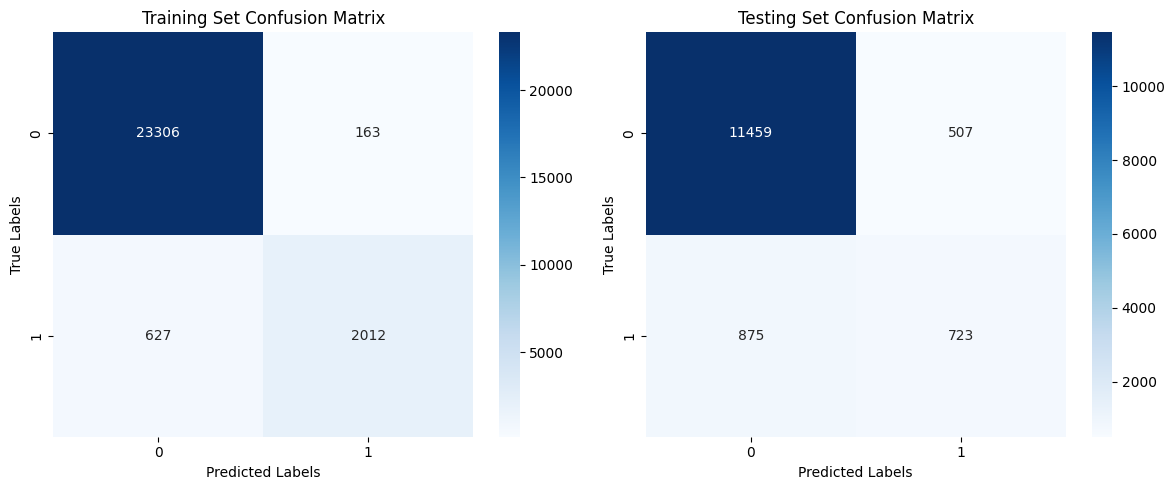

In [ ]:
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    # 訓練集上的模型評分
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='binary')
    train_recall = recall_score(y_train, y_train_pred, average='binary')
    train_f1 = f1_score(y_train, y_train_pred, average='binary')
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_classification_report = classification_report(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)
    print("Training Set Evaluation:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1 Score:", train_f1)
    # print("Confusion Matrix:")
    # print(train_conf_matrix)
    print("Classification Report:")
    print(train_classification_report)
    print("AUC:")
    print(train_auc)
    print("\n")

    # 測試集上的模型評分
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='binary')
    test_recall = recall_score(y_test, y_test_pred, average='binary')
    test_f1 = f1_score(y_test, y_test_pred, average='binary')
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_report = classification_report(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    print("Testing Set Evaluation:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1 Score:", test_f1)
    # print("Confusion Matrix:")
    # print(test_conf_matrix)
    print("Classification Report:")
    print(test_classification_report)
    print("AUC:")
    print(test_auc)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Training Set Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Testing Set Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()
evaluate_model_performance(xgb_model, X_train_no_outliers, X_test, y_train_no_outliers, y_test)

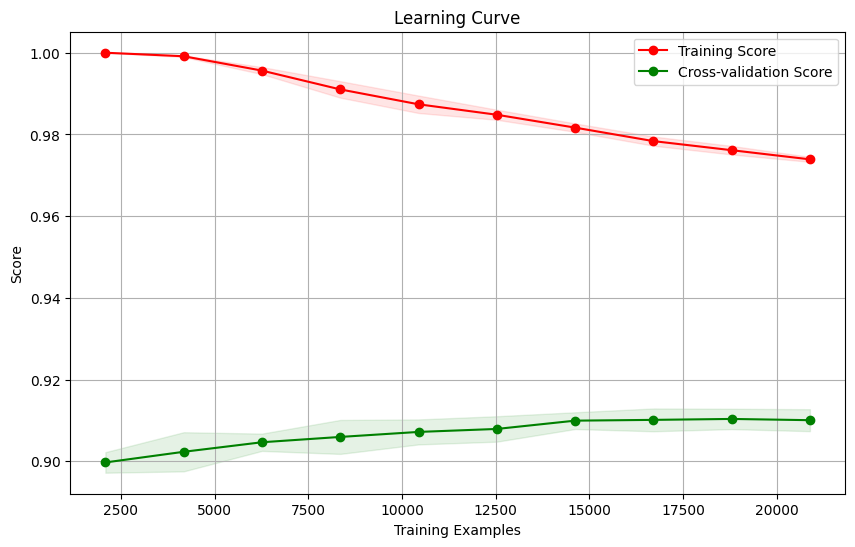

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [1.         0.99913814 0.9956265  0.99102226 0.98737911 0.98482164
 0.98166895 0.97836964 0.97614513 0.97390597]
Test Scores Mean: [0.89972438 0.90232894 0.90466523 0.9059675  0.90719315 0.90792101
 0.90995092 0.91014244 0.91037232 0.91006592]


In [ ]:
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1)
    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

    # Print additional information
    print("Train Sizes:", train_sizes)
    print("Train Scores Mean:", train_scores_mean)
    print("Test Scores Mean:", test_scores_mean)
plot_learning_curve(xgb_model, X_train_no_outliers, y_train_no_outliers)

In [ ]:
def plot_roc_curves(pipelines, X_test, y_test):
    plt.figure()
    for name, pipeline in pipelines.items():
        # Predict probabilities
        if hasattr(pipeline, 'predict_proba'):
            y_probs = pipeline.predict_proba(X_test)[:, 1]
        else:
            y_probs = pipeline.decision_function(X_test)

        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = roc_auc_score(y_test, y_probs)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:0.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

=====Evaluating Logistic Regression model..=====
Training Set Evaluation:
Accuracy: 0.9046652367090547
Precision: 0.5717017208413002
Recall: 0.22660098522167488
F1 Score: 0.3245590230664858
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     23469
           1       0.57      0.23      0.32      2639

    accuracy                           0.90     26108
   macro avg       0.75      0.60      0.64     26108
weighted avg       0.88      0.90      0.89     26108

AUC:
0.6037559870929201


Testing Set Evaluation:
Accuracy: 0.8849159539958714
Precision: 0.5203969128996693
Recall: 0.295369211514393
F1 Score: 0.3768463073852295
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11966
           1       0.52      0.30      0.38      1598

    accuracy                           0.88     13564
   macro avg       0.72      0.63      0.66     13564
w

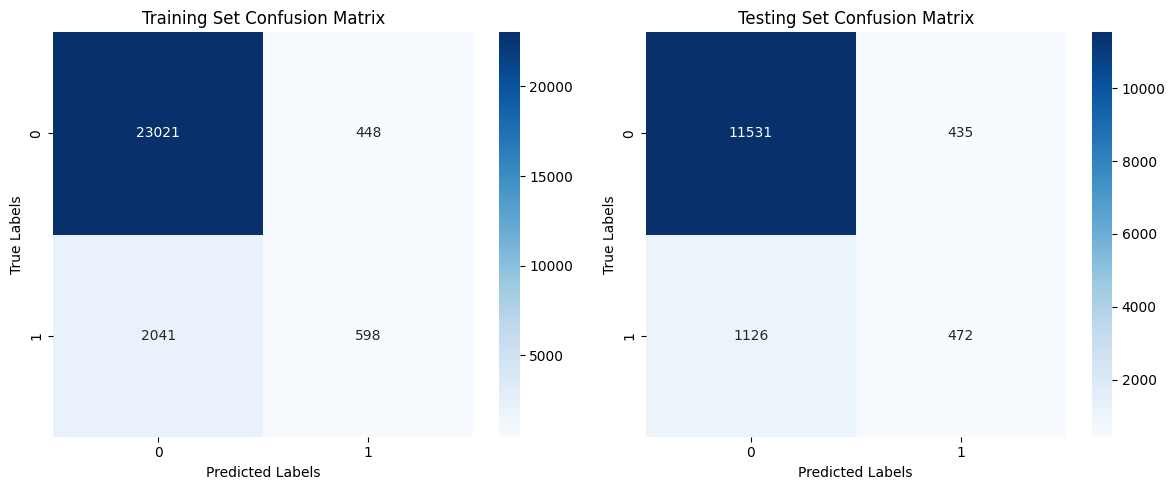

=====Learning_curve Logistic Regression model..=====


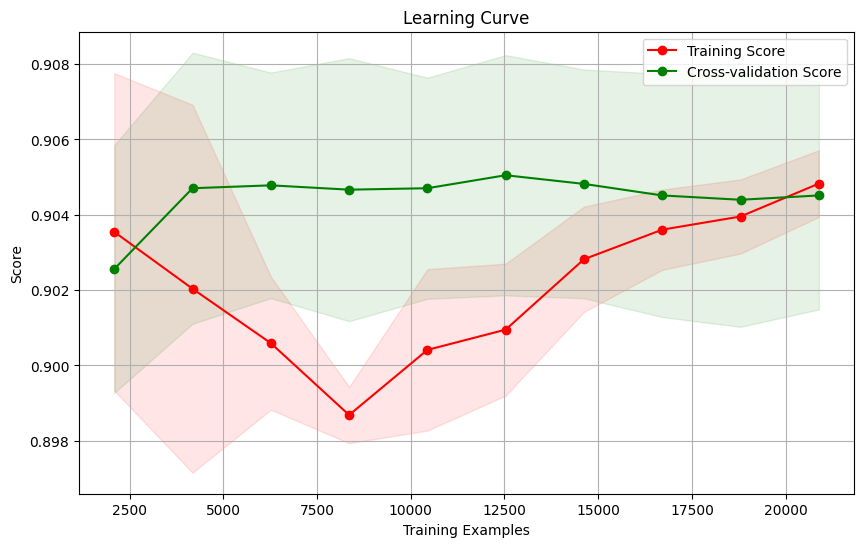

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [0.90354406 0.90203495 0.90059058 0.89868327 0.90041176 0.90094964
 0.90281806 0.90360306 0.90395276 0.9048262 ]
Test Scores Mean: [0.90255872 0.90470374 0.90478029 0.90466542 0.90470371 0.90504845
 0.90481861 0.90451219 0.9043973  0.90451219]
=====Evaluating Decision Tree model..=====
Training Set Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23469
           1       1.00      1.00      1.00      2639

    accuracy                           1.00     26108
   macro avg       1.00      1.00      1.00     26108
weighted avg       1.00      1.00      1.00     26108

AUC:
1.0


Testing Set Evaluation:
Accuracy: 0.8593335299321734
Precision: 0.41223103057757643
Recall: 0.4555694618272841
F1 Score: 0.4328180737217598
Classification Report:
              p

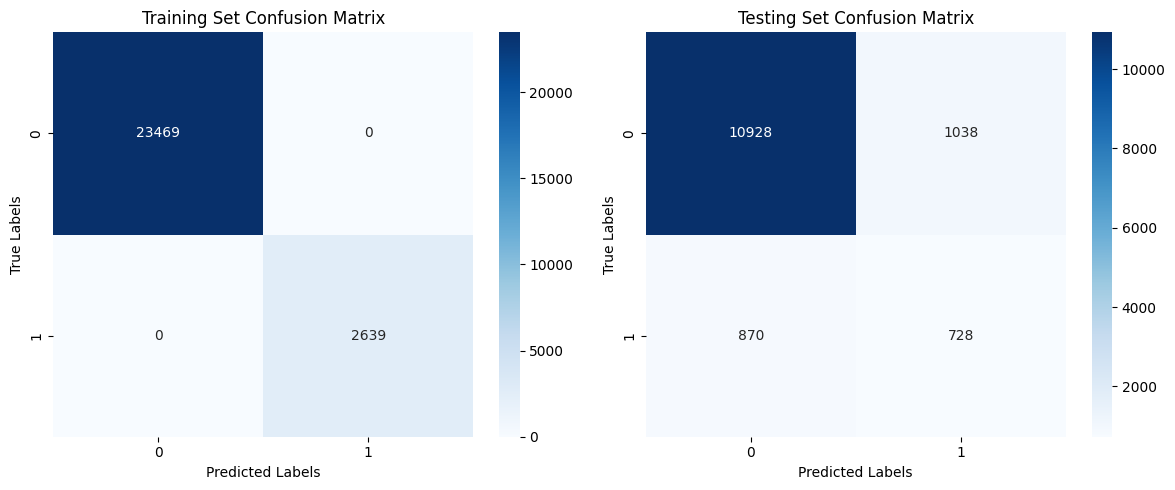

=====Learning_curve Decision Tree model..=====


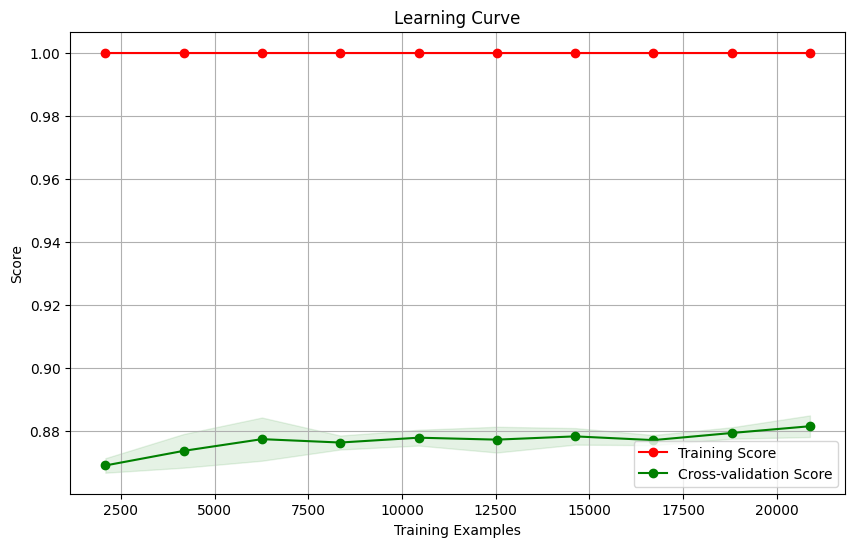

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test Scores Mean: [0.86904409 0.87367882 0.8773944  0.87632158 0.87785367 0.87724095
 0.87827498 0.87708751 0.87934749 0.88149254]
=====Evaluating Random Forest model..=====
Training Set Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23469
           1       1.00      1.00      1.00      2639

    accuracy                           1.00     26108
   macro avg       1.00      1.00      1.00     26108
weighted avg       1.00      1.00      1.00     26108

AUC:
1.0


Testing Set Evaluation:
Accuracy: 0.8996608670008847
Precision: 0.6233090530697191
Recall: 0.37484355444305384
F1 Score: 0.46815162172723723
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0

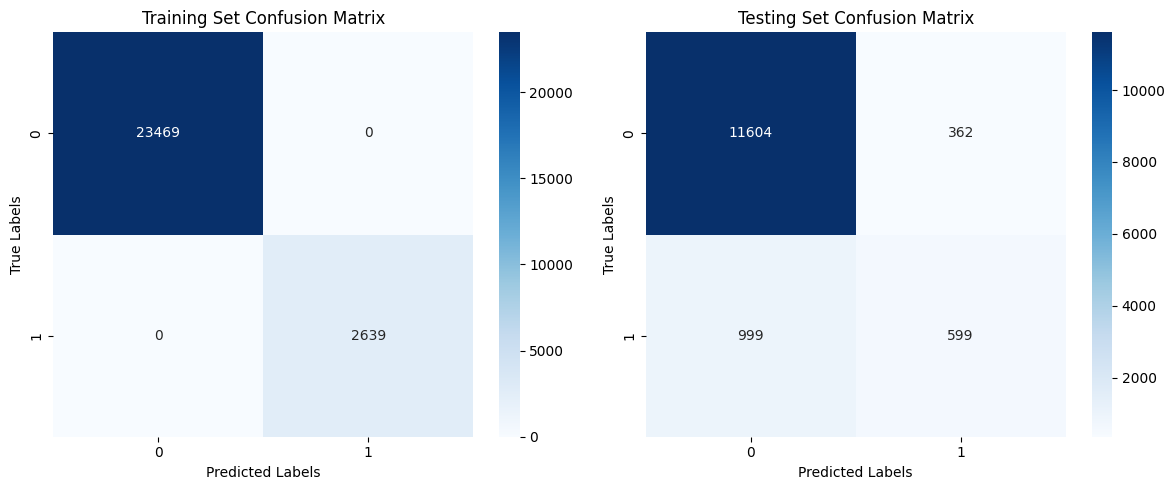

=====Learning_curve Random Forest model..=====


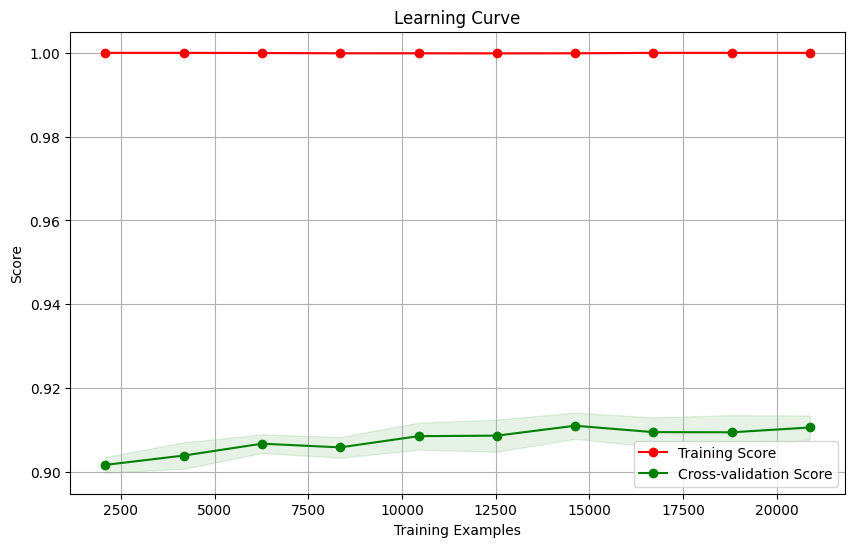

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [1.         1.         0.99996808 0.99990424 0.99990424 0.99988828
 0.99990424 1.         1.         1.        ]
Test Scores Mean: [0.90163927 0.90386098 0.90669538 0.90581439 0.90849552 0.90861046
 0.91098518 0.90945306 0.9094148  0.91056394]
=====Evaluating SVM model..=====
Training Set Evaluation:
Accuracy: 0.911253255707063
Precision: 0.7630718954248366
Recall: 0.17696097006441833
F1 Score: 0.28729621654875415
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23469
           1       0.76      0.18      0.29      2639

    accuracy                           0.91     26108
   macro avg       0.84      0.59      0.62     26108
weighted avg       0.90      0.91      0.89     26108

AUC:
0.5853913035587761


Testing Set Evaluation:
Accuracy: 0.8908139191978768
Precision: 0.6242038216560509
Recall: 0.18397997496871088
F

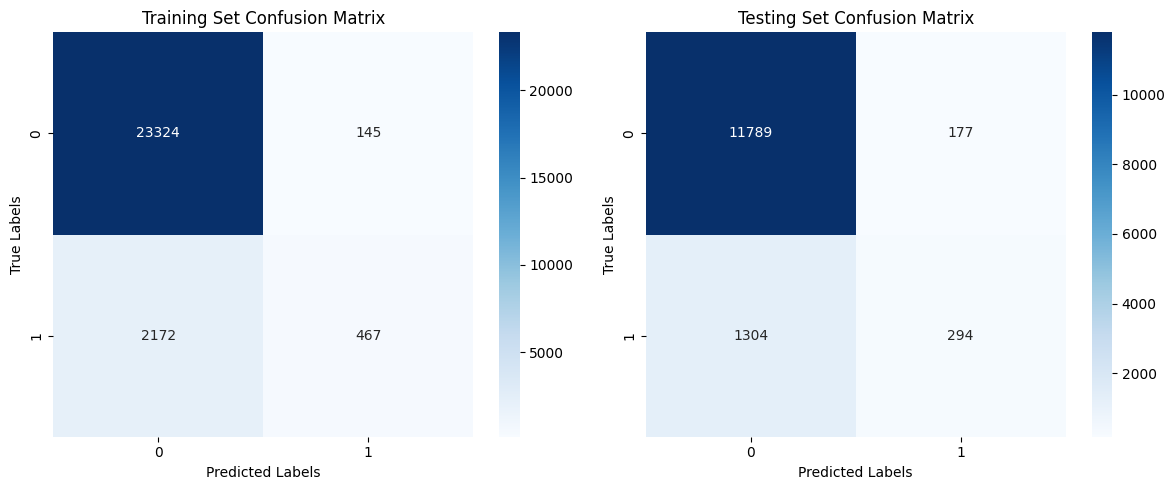

=====Learning_curve SVM model..=====


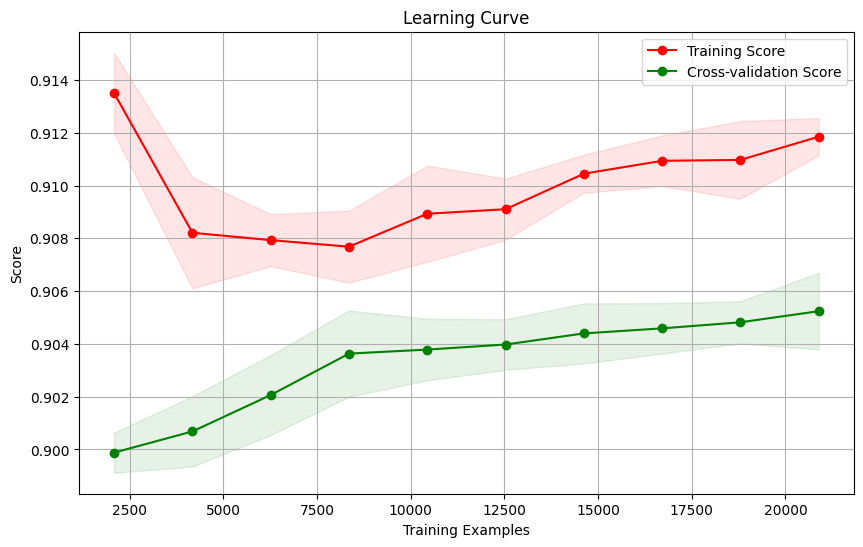

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [0.91350575 0.90821164 0.90793296 0.90768494 0.90893421 0.90910542
 0.91045144 0.91094087 0.91097516 0.91185483]
Test Scores Mean: [0.89987742 0.90068169 0.90206055 0.90363101 0.90378429 0.9039758
 0.90439712 0.90458864 0.90481848 0.90523975]
=====Evaluating KNN model..=====
Training Set Evaluation:
Accuracy: 0.925271947295848
Precision: 0.7625954198473283
Recall: 0.37855248200075786
F1 Score: 0.5059508736388959
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     23469
           1       0.76      0.38      0.51      2639

    accuracy                           0.93     26108
   macro avg       0.85      0.68      0.73     26108
weighted avg       0.92      0.93      0.91     26108

AUC:
0.6826504793573606


Testing Set Evaluation:
Accuracy: 0.8887496313771749
Precision: 0.5575679172056921
Recall: 0.26971214017521905
F1 

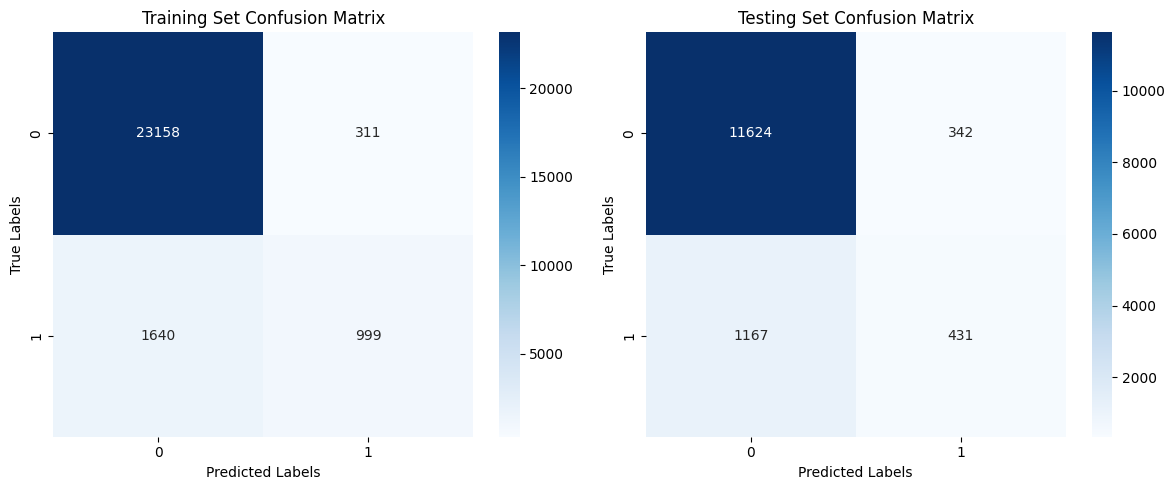

=====Learning_curve KNN model..=====


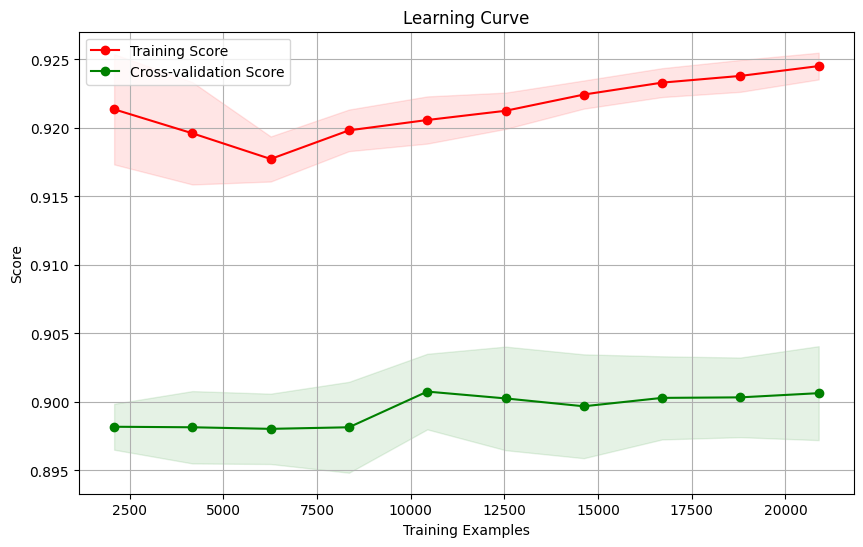

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [0.92136015 0.91960737 0.91773344 0.91982284 0.92057838 0.9212513
 0.92243502 0.9233062  0.92379635 0.92451403]
Test Scores Mean: [0.89819214 0.89815392 0.89803894 0.89815393 0.90075844 0.90026042
 0.89968597 0.90029886 0.90033715 0.90064355]
=====Evaluating XGBoost model..=====
Training Set Evaluation:
Accuracy: 0.9697410755324039
Precision: 0.9250574712643678
Recall: 0.7624100037893141
F1 Score: 0.8358953053593684
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23469
           1       0.93      0.76      0.84      2639

    accuracy                           0.97     26108
   macro avg       0.95      0.88      0.91     26108
weighted avg       0.97      0.97      0.97     26108

AUC:
0.877732335824522


Testing Set Evaluation:
Accuracy: 0.8981126511353583
Precision: 0.5878048780487805
Recall: 0.4524405506883605
F

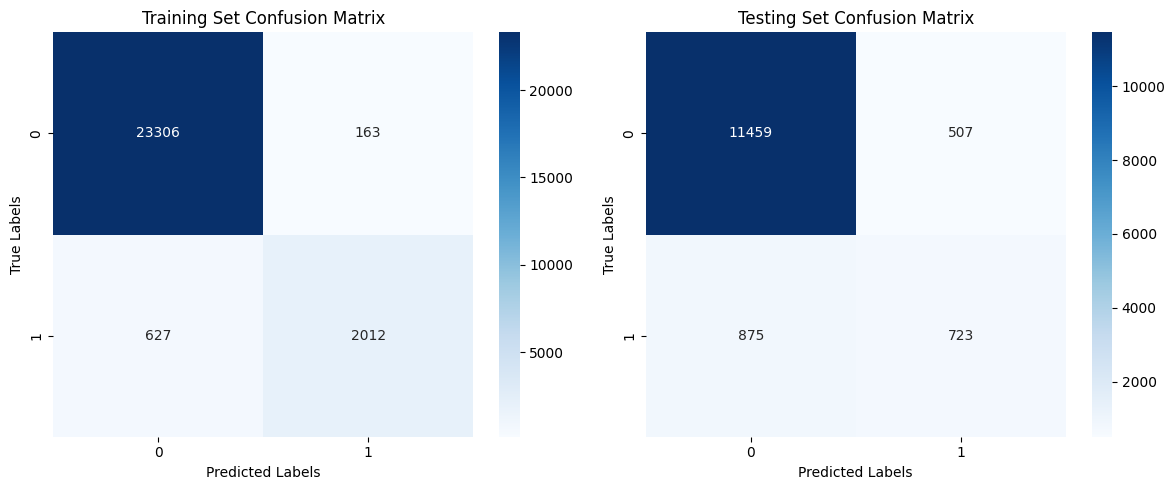

=====Learning_curve XGBoost model..=====


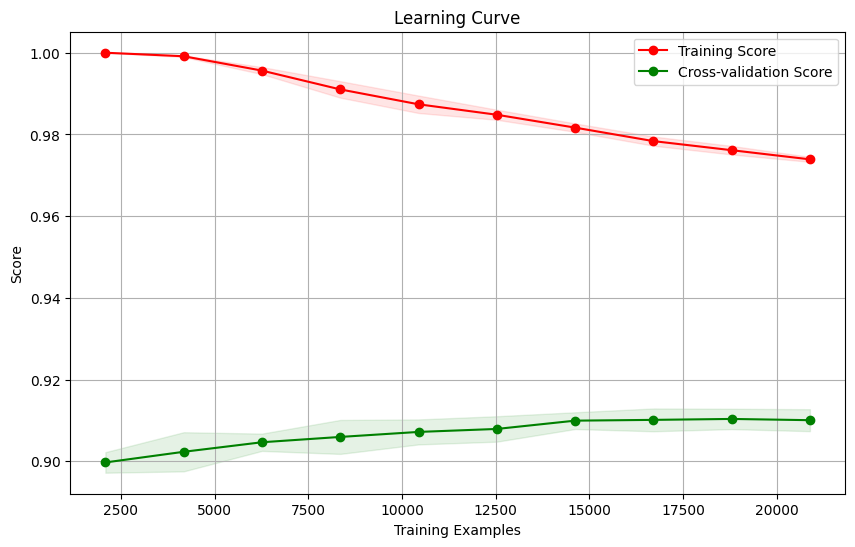

Train Sizes: [ 2088  4177  6265  8354 10443 12531 14620 16708 18797 20886]
Train Scores Mean: [1.         0.99913814 0.9956265  0.99102226 0.98737911 0.98482164
 0.98166895 0.97836964 0.97614513 0.97390597]
Test Scores Mean: [0.89972438 0.90232894 0.90466523 0.9059675  0.90719315 0.90792101
 0.90995092 0.91014244 0.91037232 0.91006592]
=====Plotting ROC curves for all models..=====


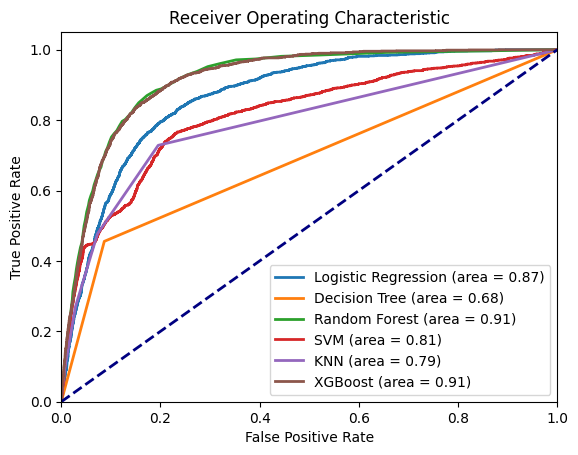

In [24]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'SVM': Pipeline([
        ('classifier', SVC(random_state=42))
    ]),
    'KNN': Pipeline([
        ('classifier', KNeighborsClassifier())
    ]),
    'XGBoost': Pipeline([
        ('classifier', XGBClassifier(random_state=42))
    ])
}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train_no_outliers, y_train_no_outliers)
    # print(f"{name} model trained.")
for name, pipeline in pipelines.items():
    print(f"=====Evaluating {name} model..=====")
    evaluate_model_performance(pipeline, X_train_no_outliers, X_test, y_train_no_outliers, y_test)
    print(f"=====Learning_curve {name} model..=====")
    plot_learning_curve(pipeline, X_train_no_outliers, y_train_no_outliers)
    print("="*50)

print(f"=====Plotting ROC curves for all models..=====")
plot_roc_curves(pipelines, X_test, y_test)
print("="*50)

In [ ]:
# pipelines = {
#     'Logistic Regression': Pipeline([
#         # ('scaler', StandardScaler()),
#         ('classifier', LogisticRegression(random_state=42))
#     ]),
#     'Decision Tree': Pipeline([
#         ('classifier', DecisionTreeClassifier(random_state=42))
#     ]),
#     'Random Forest': Pipeline([
#         ('classifier', RandomForestClassifier(random_state=42))
#     ])
# }
# for name, pipeline in pipelines.items():
#     pipeline.fit(X_train, y_train)
#     # print(f"{name} model trained.")
# for name, pipeline in pipelines.items():
#     print(f"=====Evaluating {name} model..=====")
#     evaluate_model_performance(pipeline, X_train, X_test, y_train, y_test)
#     print(f"=====Learning_curve {name} model..=====")
#     plot_learning_curve(pipeline, X_train, y_train)
#     print("="*50)